# Conectividade

## Clustering

#### 1 - Bibliotecas

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
%matplotlib inline

#### 2 - Carregando e Desenhando uma rede

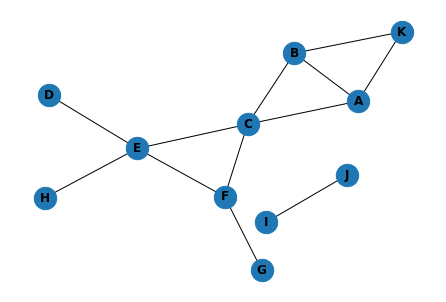

In [3]:
G = nx.Graph()

G.add_edges_from([('A','K'),('A','B'),('A','C'),('B','C'),
                  ('B','K'),('C','E'),('C','F'),('D','E'),
                  ('E','F'),('E','H'),('F','G'),('I','J')])

nx.draw_kamada_kawai(G, with_labels=True, node_size=500, font_weight='bold')

#### 3 - Local clustering

In [4]:
nx.clustering(G, 'A')

0.6666666666666666

In [5]:
nx.clustering(G, 'D')

0

#### 4 - Global clustering

In [6]:
nx.average_clustering(G)

0.28787878787878785

#### 5 - Global clustering - Transitividade

In [7]:
nx.transitivity(G)

0.4090909090909091

#### 6 - Clustering na rede de jogadores de xadrez

In [8]:
chess = nx.read_edgelist('./Data/chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())
chess

In [9]:
chessUn = nx.Graph(chess)

In [10]:
nx.transitivity(chessUn)

0.12584460372962175

In [11]:
nx.average_clustering(chessUn)

0.17669736820407259

## Distâncias

#### 7 - Carregando e desenhando a rede

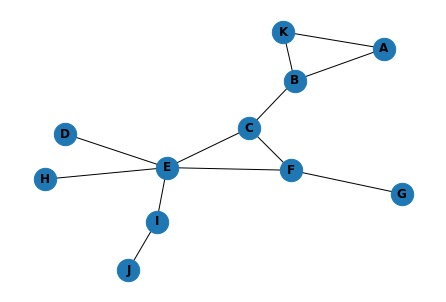

In [12]:
G = nx.Graph()

G.add_edges_from([('A','K'),('A','B'),('B','C'),('B','K'),
                  ('C','E'),('C','F'),('D','E'),('E','F'),
                  ('E','H'),('E','I'),('F','G'),('I','J')])

nx.draw_kamada_kawai(G, with_labels=True, node_size=500, font_weight='bold')

#### 8 - Menor caminho

In [13]:
nx.shortest_path(G, 'A', 'H')

['A', 'B', 'C', 'E', 'H']

#### 9 - Comprimento do menor caminho

In [14]:
nx.shortest_path_length(G, 'A', 'H')

4

#### 10 - Pesquisa através do primeiro encontro

In [15]:
T = nx.bfs_tree(G,'A')
T.edges()

OutEdgeView([('A', 'K'), ('A', 'B'), ('B', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'H'), ('E', 'I'), ('F', 'G'), ('I', 'J')])

#### 11 - Desenhando a árvore

In [17]:
# pos = graphviz_layout(G, prog='dot')
# nx.draw(T, pos, with_labels=True, node_size=500, font_weight='bold', arrows=True)

#### 12 - Comprimento do menor caminho (para todos os outros nós)

In [18]:
nx.shortest_path_length(T,'A')

{'A': 0,
 'K': 1,
 'B': 1,
 'C': 2,
 'F': 3,
 'E': 3,
 'G': 4,
 'H': 4,
 'I': 4,
 'D': 4,
 'J': 5}

#### 13 - Distância média

In [19]:
nx.average_shortest_path_length(G)

2.5272727272727273

#### 14 - Diâmetro

In [20]:
nx.diameter(G)

5

#### 15 - Eccentricidade

In [21]:
nx.eccentricity(G)

{'A': 5,
 'K': 5,
 'B': 4,
 'C': 3,
 'E': 3,
 'F': 3,
 'D': 4,
 'H': 4,
 'I': 4,
 'G': 4,
 'J': 5}

#### 16 - Raio

In [22]:
nx.radius(G)

3

#### 17 - Periferia

In [23]:
nx.periphery(G)

['A', 'K', 'J']

#### 18 - Centro

In [24]:
nx.center(G)

['C', 'E', 'F']

#### 19 - Exemplos de métricas de distâncias na rede Karate-club

1 16
2 9
3 10
4 6
5 3
6 4
7 4
8 4
9 5
10 2
11 3
12 1
13 2
14 5
15 2
16 2
17 2
18 2
19 2
20 3
21 2
22 2
23 2
24 5
25 3
26 3
27 2
28 4
29 3
30 4
31 4
32 6
33 12
34 17


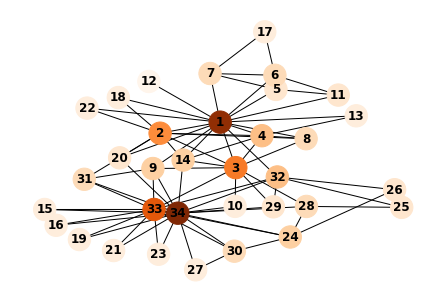

In [25]:
K = nx.karate_club_graph()
K = nx.convert_node_labels_to_integers(K, first_label=1)

colors = []
for v in K:
    print('%s %s' % (v, K.degree(v)))
    colors.append(K.degree(v))

nx.draw_kamada_kawai(K, node_color=colors, with_labels=True, cmap=plt.cm.Oranges, node_size=500, font_weight='bold')

In [26]:
nx.average_shortest_path_length(K)

2.408199643493761

In [27]:
nx.diameter(K)

5

In [28]:
nx.radius(K)

3

In [29]:
nx.center(K)

[1, 2, 3, 4, 9, 14, 20, 32]

In [30]:
nx.periphery(K)

[15, 16, 17, 19, 21, 23, 24, 27, 30]

## Componentes

#### 20 - Carregando e desenhando rede não-direta

In [31]:
G = nx.Graph()
G.add_edges_from([('A','E'),('A','B'),('A','C'),
                  ('E','C'),('E','B'),('E','D'),
                  ('D','B'),('D','C'),('C','B')])

G.add_edges_from([('G','H'),('G','F'),('G','I'),('G','J'),
                  ('H','I'),('I','F'),('I','J'),
                  ('J','F')])

G.add_edges_from([('M','L'),('M','K'),('L','N'),('L','K'),
                  ('L','O'),('K','O'),('O','N')])

G.add_edges_from([('A','G'),('A','N'),('J','O')])

A 5
E 4
B 4
C 4
D 3
G 5
H 2
F 3
I 4
J 4
M 2
L 4
K 3
N 3
O 4


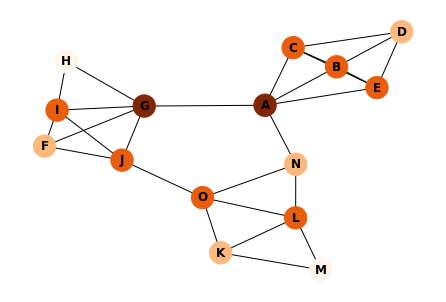

In [33]:
colors = []
for v in G:
    print('%s %s' % (v, G.degree(v)))
    colors.append(G.degree(v))

nx.draw_kamada_kawai(G, node_color=colors, with_labels=True, cmap=plt.cm.Oranges, node_size=500, font_weight='bold')

#### 21 - Verificar se a rede é (ou está) conectada

In [34]:
nx.is_connected(G)

True

A 3
E 4
B 4
C 4
D 3
G 4
H 2
F 3
I 4
J 3
M 2
L 4
K 3
N 2
O 3


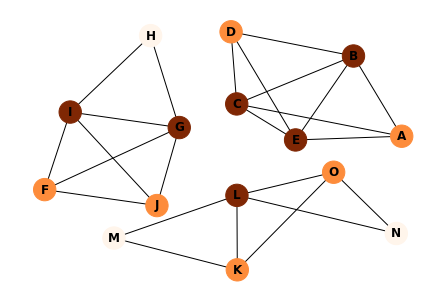

In [35]:
G.remove_edges_from([('A','G'),('A','N'),('J','O')])

colors = []
for v in G:
    print('%s %s' % (v, G.degree(v)))
    colors.append(G.degree(v))

nx.draw_kamada_kawai(G, node_color=colors, with_labels=True, cmap=plt.cm.Oranges, node_size=500, font_weight='bold')

In [36]:
nx.is_connected(G)

False

#### 22 - Imprimindo cada componente

In [37]:
sorted(nx.connected_components(G))

[{'A', 'B', 'C', 'D', 'E'},
 {'F', 'G', 'H', 'I', 'J'},
 {'K', 'L', 'M', 'N', 'O'}]

#### 23 - Procurando por um componente

In [38]:
nx.node_connected_component(G, 'M')

{'K', 'L', 'M', 'N', 'O'}

#### 24 - Carregando e desenhando rede direta

In [39]:
G2 = nx.DiGraph()
G2.add_edges_from([('A','E'),('A','B'),('A','C'),
                  ('E','C'),('E','B'),('E','D'),
                  ('D','B'),('D','C'),('C','B')])

G2.add_edges_from([('G','H'),('G','F'),('G','I'),('G','J'),
                  ('H','I'),('I','F'),('I','J'),
                  ('J','F')])

G2.add_edges_from([('M','L'),('M','K'),('L','N'),('L','K'),
                  ('O','L'),('K','O'),('O','N')])

G2.add_edges_from([('G','A'),('A','N'),('J','O')])

A 5
E 4
B 4
C 4
D 3
G 5
H 2
F 3
I 4
J 4
M 2
L 4
K 3
N 3
O 4


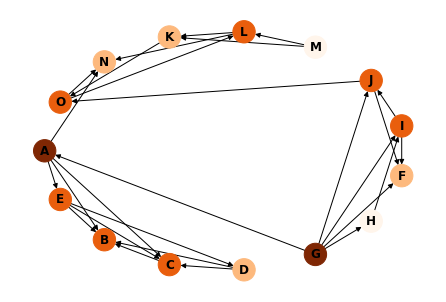

In [40]:
colors = []
for v in G2:
    print('%s %s' % (v, G2.degree(v)))
    colors.append(G2.degree(v));

nx.draw_shell(G2, node_color=colors, with_labels=True, cmap=plt.cm.Oranges, node_size=500, font_weight='bold')

#### 25 - Forte vs. Fraca conectividade

In [41]:
nx.is_strongly_connected(G2)

False

In [42]:
nx.is_weakly_connected(G2)

True

In [43]:
sorted(nx.strongly_connected_components(G2))

[{'B'},
 {'C'},
 {'D'},
 {'E'},
 {'N'},
 {'A'},
 {'F'},
 {'K', 'L', 'O'},
 {'J'},
 {'I'},
 {'H'},
 {'G'},
 {'M'}]

## Robustez da rede

#### 26 - Quantos nós é preciso retirarmos para tornar a rede desconectada?

A 3
E 4
B 4
C 4
D 3
G 4
H 2
F 3
I 4
J 3
M 2
L 4
K 3
N 2
O 3


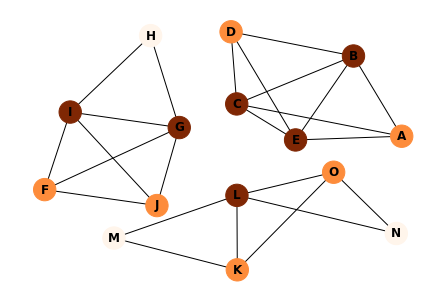

In [44]:
#G.add_edges_from([('A','G'),('A','N'),('J','O')])
colors = []
for v in G:
    print('%s %s' % (v, G.degree(v)))
    colors.append(G.degree(v))

nx.draw_kamada_kawai(G, node_color=colors, with_labels=True, cmap=plt.cm.Oranges, node_size=500, font_weight='bold')

In [45]:
nx.node_connectivity(G)

0

#### 27 - Qual nó (ou nós) podem ser removidos para tornar a rede desconectada?

In [47]:
# nx.minimum_node_cut(G)

#### 28 - Quantas arestas é preciso retirarmos para tornar a rede desconectada?

In [48]:
nx.edge_connectivity(G)

0

#### 29 - Quais arestas precisam ser removidos para tornar a rede desconectada?

In [49]:
nx.minimum_edge_cut(G, 'E', 'A')

{('B', 'A'), ('C', 'A'), ('E', 'A')}

#### 30 - Caminhos entre G e L

In [50]:
sorted(nx.all_simple_paths(G,'G','L'))

[]